In [11]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

import copy
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [12]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """

    A = 1 / (1 + np.exp(-Z))
    cache = Z

    return A, cache

In [13]:
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """

    A = np.maximum(0, Z)

    assert A.shape == Z.shape

    cache = Z
    return A, cache

In [14]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache

    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)

    assert dZ.shape == Z.shape

    return dZ

In [15]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache
    dZ = np.array(dA, copy=True)  # just converting dz to a correct object.

    # When z <= 0, you should set dz to 0 as well.
    dZ[Z <= 0] = 0

    assert dZ.shape == Z.shape

    return dZ

In [16]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return parameters

In [17]:
print("Test Case 1:\n")
parameters = initialize_parameters(3, 2, 1)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

print("\nTest Case 2:\n")
parameters = initialize_parameters(4, 3, 2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Test Case 1:

W1 = [[-0.0036542  -0.00015391 -0.00438205]
 [-0.00688513 -0.00109253 -0.00570627]]
b1 = [[0.]
 [0.]]
W2 = [[0.00440844 0.01200083]]
b2 = [[0.]]

Test Case 2:

W1 = [[ 0.01287819  0.000258    0.0148672   0.01447635]
 [ 0.01990463  0.00738995 -0.00853948  0.00822332]
 [ 0.0052641  -0.00317736 -0.00660591 -0.0052218 ]]
b1 = [[0.]
 [0.]
 [0.]]
W2 = [[ 0.00098799 -0.00530707 -0.00727237]
 [ 0.00442867  0.01775801 -0.00111649]]
b2 = [[0.]
 [0.]]


In [18]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    parameters = {}
    L = len(layer_dims)  # number of layers in the network

    for l in range(1, L):
        parameters["W" + str(l)] = (
            np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        )
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))

        assert parameters["W" + str(l)].shape == (layer_dims[l], layer_dims[l - 1])
        assert parameters["b" + str(l)].shape == (layer_dims[l], 1)

    return parameters

In [19]:
print("Test Case 1:\n")
parameters = initialize_parameters_deep([5,4,3])

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

print("\nTest Case 2:\n")
parameters = initialize_parameters_deep([4,3,2])

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Test Case 1:

W1 = [[ 0.00440287  0.00570861 -0.01086553 -0.01060649  0.01101643]
 [-0.01197238  0.00158648  0.0043329  -0.00923086  0.00354372]
 [-0.01019312  0.00373705  0.00188753 -0.01013278 -0.01465797]
 [ 0.01078851 -0.00161237 -0.00369475  0.02154506 -0.00219335]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.0097245   0.01239028  0.00996037  0.01188589]
 [ 0.00203106  0.01179621 -0.01234256 -0.0132735 ]
 [-0.0037369   0.00158446  0.00450005 -0.0072437 ]]
b2 = [[0.]
 [0.]
 [0.]]

Test Case 2:

W1 = [[-0.01190058  0.00519531 -0.00800822 -0.01223806]
 [-0.00880578 -0.01558859  0.00584004  0.00879727]
 [-0.01569368  0.01143891 -0.0050823  -0.00554705]]
b1 = [[0.]
 [0.]
 [0.]]
W2 = [[-0.0004257  -0.00991846  0.01759215]
 [ 0.00151412 -0.01063434  0.00488623]]
b2 = [[0.]
 [0.]]


In [20]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """

    Z = W @ A + b
    cache = (A, W, b)
    
    return Z, cache

In [21]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value
    cache -- a python tuple containing "linear_cache" and "activation_cache";
            stored for computing the backward pass efficiently
    """
    Z, linear_cache = linear_forward(A_prev, W, b)
    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":
        A, activation_cache = relu(Z)

    cache = (linear_cache, activation_cache)

    return A, cache

In [22]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

    Returns:
    AL -- activation value from the output (last) layer
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2  # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    # The for loop starts at 1 because layer 0 is the input
    for l in range(1, L):
        A_prev = A

        A, cache = linear_activation_forward(
            A_prev, parameters["W" + str(l)], parameters["b" + str(l)], "relu"
        )
        caches.append(cache)

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(
        A, parameters["W" + str(L)], parameters["b" + str(L)], "sigmoid"
    )
    caches.append(cache)

    return AL, caches

In [23]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = -1 * (Y @ np.log(AL).T + (1 - Y) @ np.log(1 - AL).T) / m

    cost = np.squeeze(
        cost
    )  # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).

    return cost

In [24]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = dZ @ A_prev.T / m
    db = (
        np.sum(dZ, axis=1, keepdims=True) / m
    )  # sum by the rows of dZ with keepdims=True
    dA_prev = W.T @ dZ

    return dA_prev, dW, db

In [25]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.

    Arguments:
    dA -- post-activation gradient for current layer l
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache

    if activation == "relu":
        # (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db

In [26]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group

    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])

    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ...
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ...
    """
    grads = {}
    L = len(caches)  # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)  # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Lth layer (SIGMOID -> LINEAR) gradients. 
    # Inputs: "dAL, current_cache".
    # Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L - 1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(
        dAL, current_cache, "sigmoid"
    )
    grads["dA" + str(L - 1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp

    # Loop from l=L-2 to l=0
    for l in reversed(range(L - 1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". 
        # Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)]
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(
            dA_prev_temp, current_cache, "relu"
        )
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [27]:
def update_parameters(params, grads, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    params -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients, output of L_model_backward

    Returns:
    parameters -- python dictionary containing your updated parameters
                  parameters["W" + str(l)] = ...
                  parameters["b" + str(l)] = ...
    """
    parameters = copy.deepcopy(params)
    L = len(parameters) // 2  # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l + 1)] -= learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] -= learning_rate * grads["db" + str(l + 1)]

    return parameters

In [28]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model

    Returns:
    p -- predictions for the given dataset X
    """

    m = X.shape[1]
    n = len(parameters) // 2  # number of layers in the neural network
    p = np.zeros((1, m))

    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0, i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0

    # print results
    # print ("predictions: " + str(p))
    # print ("true labels: " + str(y))
    print("Accuracy: " + str(np.sum((p == y) / m)))

    return p

In [29]:
def load_data():
    train_dataset = h5py.File("datasets/train_catvnoncat.h5", "r")
    train_set_x_orig = np.array(
        train_dataset["train_set_x"][:]
    )  # your train set features
    train_set_y_orig = np.array(
        train_dataset["train_set_y"][:]
    )  # your train set labels

    test_dataset = h5py.File("datasets/test_catvnoncat.h5", "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # your test set labels

    classes = np.array(test_dataset["list_classes"][:])  # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [30]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


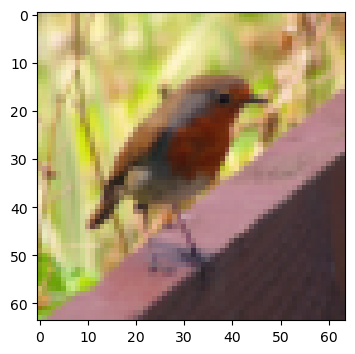

In [31]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print(
    "y = "
    + str(train_y[0, index])
    + ". It's a "
    + classes[train_y[0, index]].decode("utf-8")
    + " picture."
)

In [32]:
# Explore your dataset
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print("Number of training examples: " + str(m_train))
print("Number of testing examples: " + str(m_test))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_x_orig shape: " + str(train_x_orig.shape))
print("train_y shape: " + str(train_y.shape))
print("test_x_orig shape: " + str(test_x_orig.shape))
print("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [33]:
# Reshape the training and test examples
train_x_flatten = train_x_orig.reshape(
    train_x_orig.shape[0], -1
).T  # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.0
test_x = test_x_flatten / 255.0

print("train_x's shape: " + str(train_x.shape))
print("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [34]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288  # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

In [35]:
("test_x's shape: " + str(test_x.shape))

"test_x's shape: (12288, 50)"

In [36]:
def two_layer_model(
    X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False
):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations

    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """

    grads = {}
    costs = []  # to keep track of the cost
    m = X.shape[1]  # number of examples
    (n_x, n_h, n_y) = layers_dims

    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)

    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Loop (gradient descent)

    for i in range(0, num_iterations):
        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. 
        # Inputs: "X, W1, b1, W2, b2". 
        # Output: "A1, cache1, A2, cache2".

        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")

        # Compute cost
        cost = compute_cost(A2, Y)

        # Initializing backward propagation
        dA2 = -(np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))

        # Backward propagation. 
        # Inputs: "dA2, cache2, cache1". 
        # Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".

        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")

        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads["dW1"] = dW1
        grads["db1"] = db1
        grads["dW2"] = dW2
        grads["db2"] = db2

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs


def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel("cost")
    plt.xlabel("iterations (per hundreds)")
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [37]:
parameters, costs = two_layer_model(
    train_x, train_y, layers_dims=(n_x, n_h, n_y), num_iterations=2, print_cost=False
)

print("Cost after first iteration: " + str(costs[0]))

Cost after iteration 1: 0.6923599568114213
Cost after first iteration: 0.6926194747096799


Cost after iteration 0: 0.6946027565703901
Cost after iteration 100: 0.6441425680027867
Cost after iteration 200: 0.6269841042151699
Cost after iteration 300: 0.5914669845068794
Cost after iteration 400: 0.5488150450702516
Cost after iteration 500: 0.49779889051695225
Cost after iteration 600: 0.43572581485517514
Cost after iteration 700: 0.4038958423967222
Cost after iteration 800: 0.41760112064062677
Cost after iteration 900: 0.39504567897844106
Cost after iteration 1000: 0.3348856345445035
Cost after iteration 1100: 0.35057377162677567
Cost after iteration 1200: 0.3008280841056105
Cost after iteration 1300: 0.46380374352912873
Cost after iteration 1400: 0.15177438606949648
Cost after iteration 1500: 0.14527673641038402
Cost after iteration 1600: 0.10842862945844166
Cost after iteration 1700: 0.09677792302626248
Cost after iteration 1800: 0.08100517564612524
Cost after iteration 1900: 0.06961341347981728
Cost after iteration 2000: 0.06027315964566804
Cost after iteration 2100: 0.0527

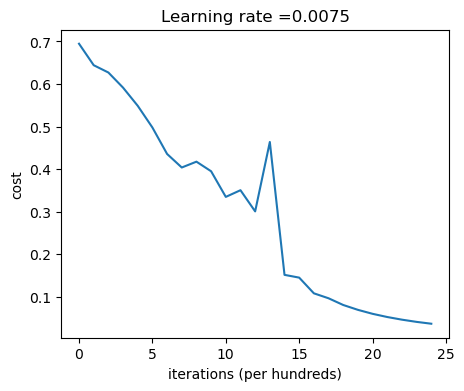

In [38]:
parameters, costs = two_layer_model(
    train_x, train_y, layers_dims=(n_x, n_h, n_y), num_iterations=2500, print_cost=True
)
plot_costs(costs, learning_rate)

In [39]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [40]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.7000000000000001


In [48]:
### CONSTANTS ###
layers_dims = [12288, 1024, 512, 32, 1]  #  4-layer model

In [49]:
def L_layer_model(
    X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False
):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    costs = []  # keep track of cost

    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)

        # Compute cost.
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

In [50]:
parameters, costs = L_layer_model(
    train_x, train_y, layers_dims, num_iterations=1, print_cost=False
)

print("Cost after first iteration: " + str(costs[0]))

Cost after iteration 0: 0.6931004964697084
Cost after first iteration: 0.6931004964697084


In [51]:
parameters, costs = L_layer_model(
    train_x, train_y, layers_dims, num_iterations=2500, print_cost=True
)

Cost after iteration 0: 0.6933488472777446
Cost after iteration 100: 0.6780244381155447
Cost after iteration 200: 0.6675511723603105
Cost after iteration 300: 0.6603471067031549
Cost after iteration 400: 0.6553735479970256
Cost after iteration 500: 0.6519259170148625
Cost after iteration 600: 0.6495296120672616
Cost after iteration 700: 0.6478587314747964
Cost after iteration 800: 0.6466908244118532
Cost after iteration 900: 0.6458721457703067
Cost after iteration 1000: 0.6452963638058302
Cost after iteration 1100: 0.6448892189691513
Cost after iteration 1200: 0.6445997116676919
Cost after iteration 1300: 0.6443919950262462
Cost after iteration 1400: 0.6442409732888263
Cost after iteration 1500: 0.6441275986500684
Cost after iteration 1600: 0.6440403679419883
Cost after iteration 1700: 0.6439730885578853
Cost after iteration 1800: 0.6439181275026212
Cost after iteration 1900: 0.643871237780786
Cost after iteration 2000: 0.6438286939893532
Cost after iteration 2100: 0.6437877278236261
C

In [52]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.6555023923444976


In [53]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.3400000000000001


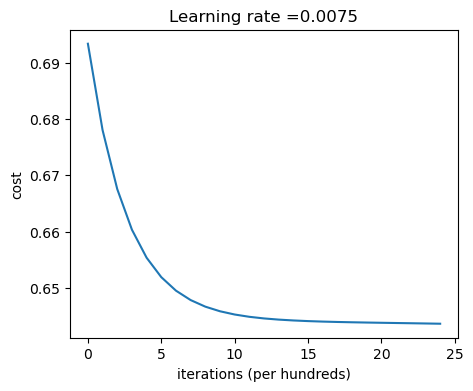

In [54]:
plot_costs(costs, learning_rate)